- 시계열 예측 (time-series forecasting)이란:
    시계열(time-series) 데이터란 시간의 흐름에 따라 순차적으로(sequentially) 기록된 데이터

- 이 때 과거의 데이터들을 분석하여 법칙성을 발견해서 이를 모델화하여 추정하고, 이 추정된 모델을 사용하여 미래에 관측될 값들을 예측


- 시계열 예측 문제:
관찰된 시계열 데이터를 분석하여 미래를 예측하는 문제(ex. 주요 경제 지표를 예측하거나(주식 가격 예측 등), 상품의 수요를 예측하는 문제 등) 

일례로 McKinsey Global Institute의 연구에 따르면, 시계열 데이터가 텍스트나 이미지 데이터 보다 더 큰 잠재적 가치를 가지고 있다고 보고있습니다.

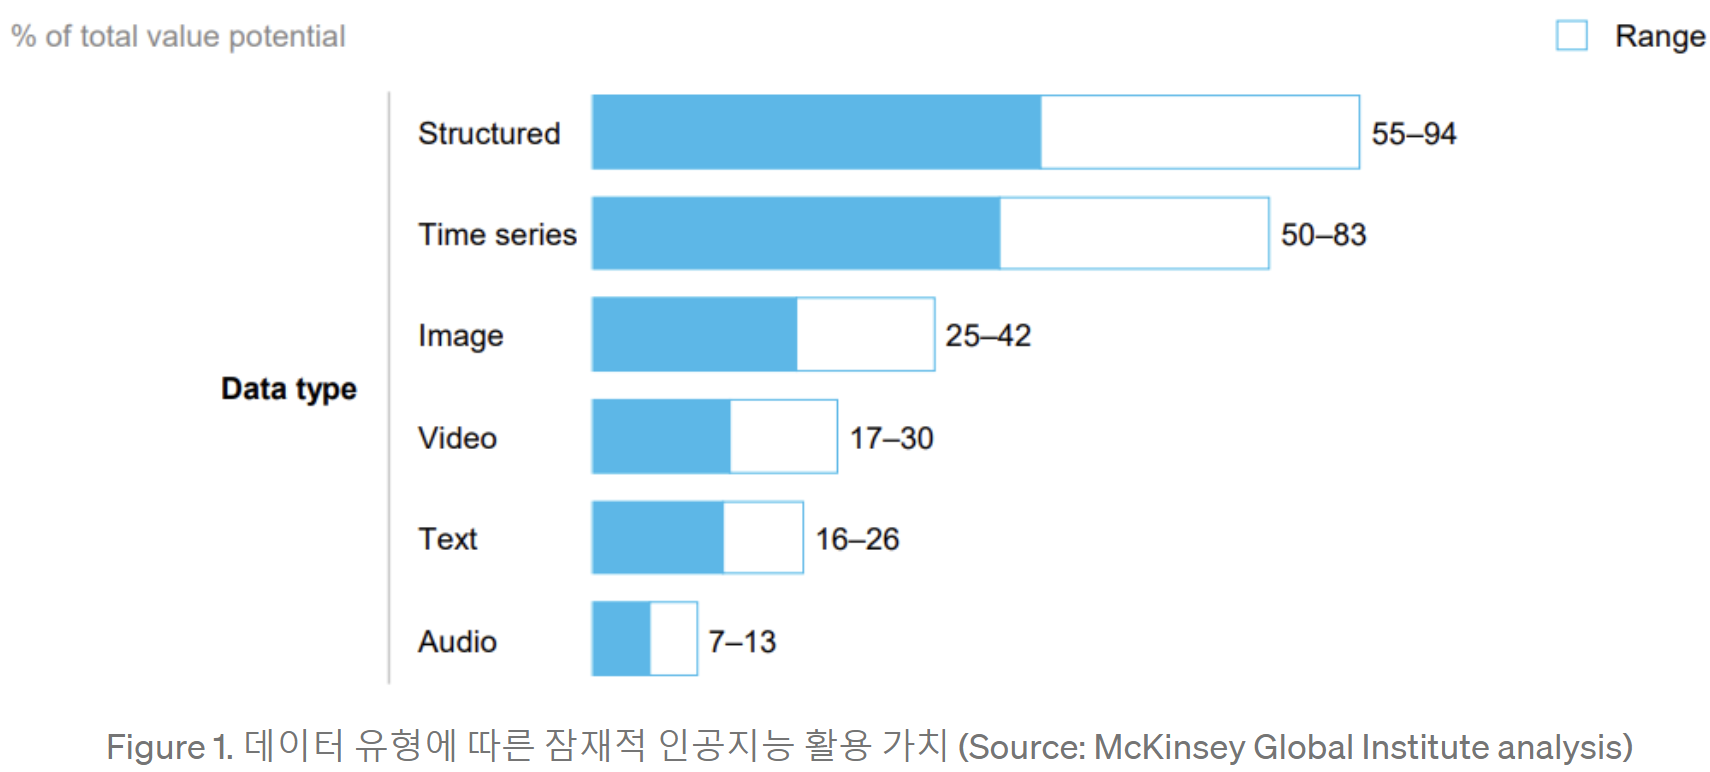

### 시계열 구성요소 

- 추세(Trend) : 추세는 장기간 데이터의 일반적인 경향을 보여줍니다. 추세는 부드럽고 일반적인 장기적인 경향입니다. 짧은 구간에서 다른 변동을 보일 수 있지만 전체 추세는 상향, 하향 또는 안정적이어야합니다. 인구, 농업 생산, 제조 품목, 출생 및 사망자 수, 산업 또는 공장 수, 학교 또는 대학 수는 일종의 운동 경향을 보여주는 예입니다.

- 순환(Cyclic Variations) : 1 년 이상 지속되는 시계열의 변동을 순환이라고 합니다. 이 변동은 1 년 이상의 주기를 갖습니다. Business cycle이라고 불리기도 합니다.

- 계절성(Seasonal Variations ) : 1 년 미만의 기간에 걸쳐 규칙적이고 주기적으로 나타나는 변동입니다. 이러한 변동은 자연의 힘이나 사람이 만든 관습으로 인해 시작됩니다. 다양한 계절 또는 기후 조건은 계절 변화에 중요한 역할을합니다. 농작물 생산량은 계절에 따라 달라지고, 여름에 선풍기와 에어컨의 판매량이 높아지고 겨울에 판매량이 낮아지는 특징을 보이는 것을 계절성이라고 합니다.

- 불규칙 변동요인(Random or Irregular movements) : 이 변동은 예측할 수없고 제어 할 수없고 예측할 수 없으며 불규칙합니다. 

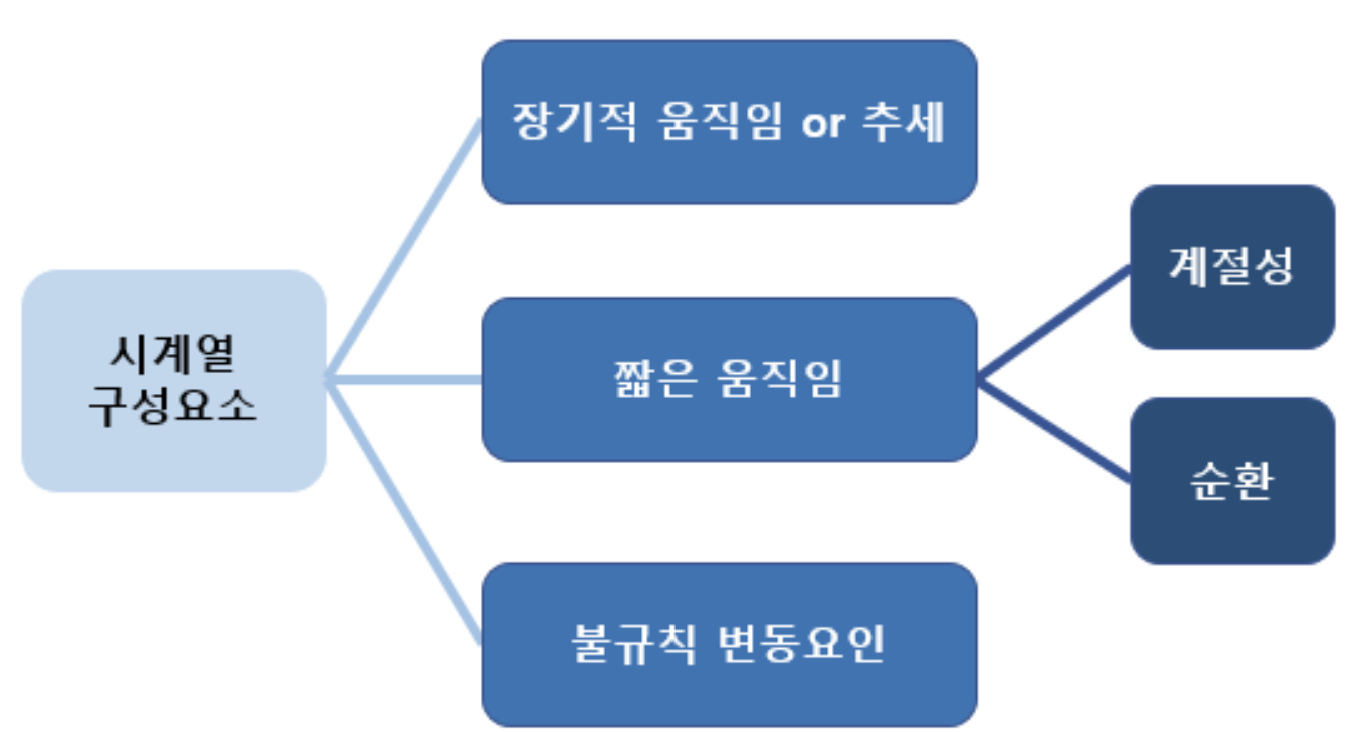


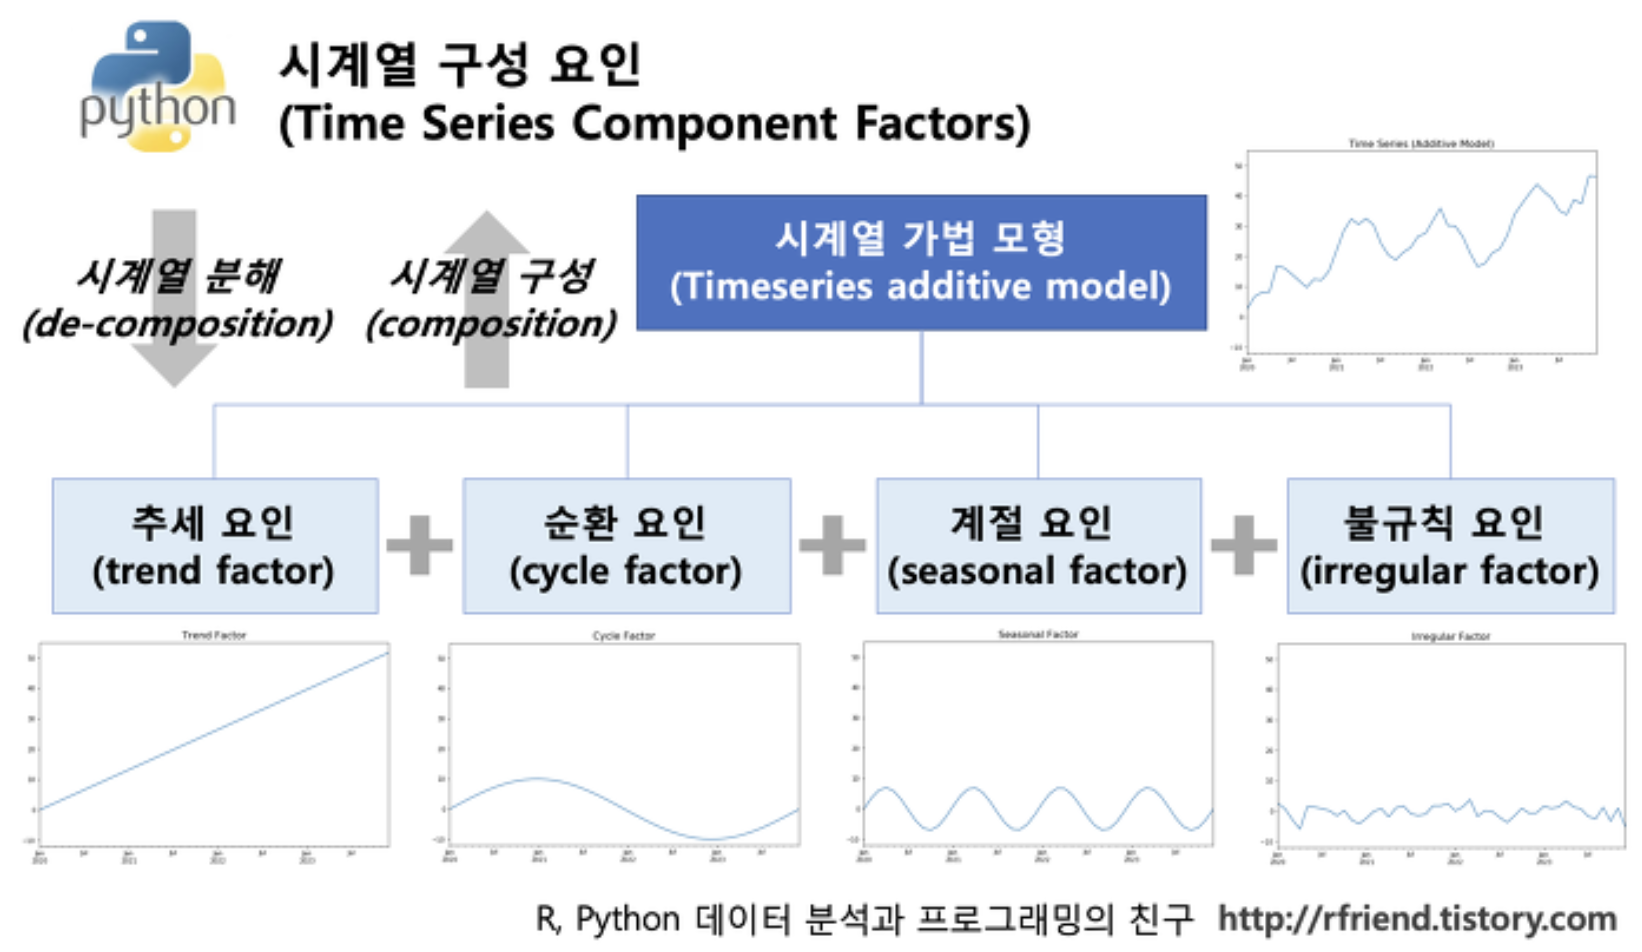

- 시계열 구성요소 간의 구성(composition) 및 시계열 분해(decomposition)

### 시계열 구성요소 간의 구성
- 가법 모형(addictive model) : 구성요소 간 독립적이라고 가정하여 각 구성요소를 더하는 모형
- 승법 모형(multiplicative model) : 구성요소 간 독립적이지 않고 상호작용 한다고 가정하여 구성요소 간 곱해주는 모형

### 시계열 분해 
- 여러 구성요소가 하나의 시계열 모형으로 있는 것을 여러개로 나누는 것

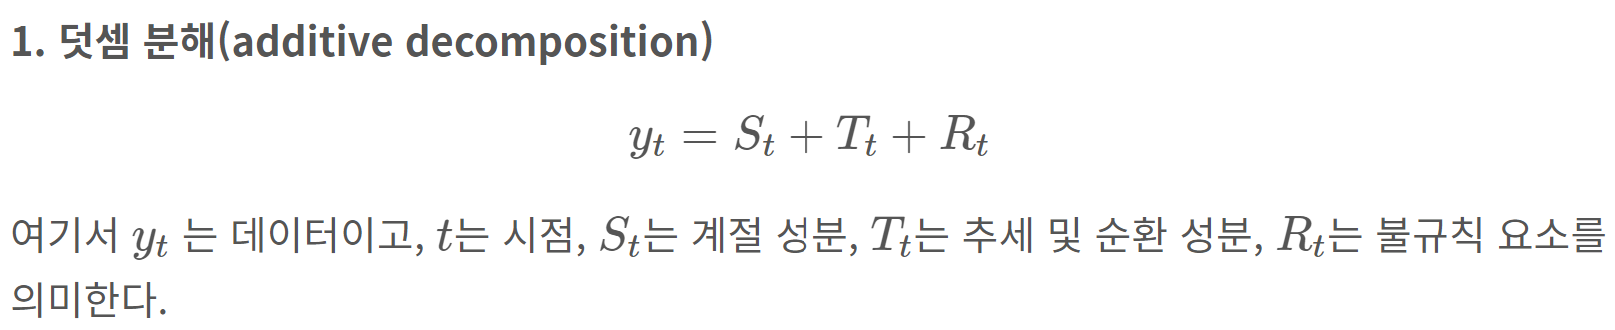


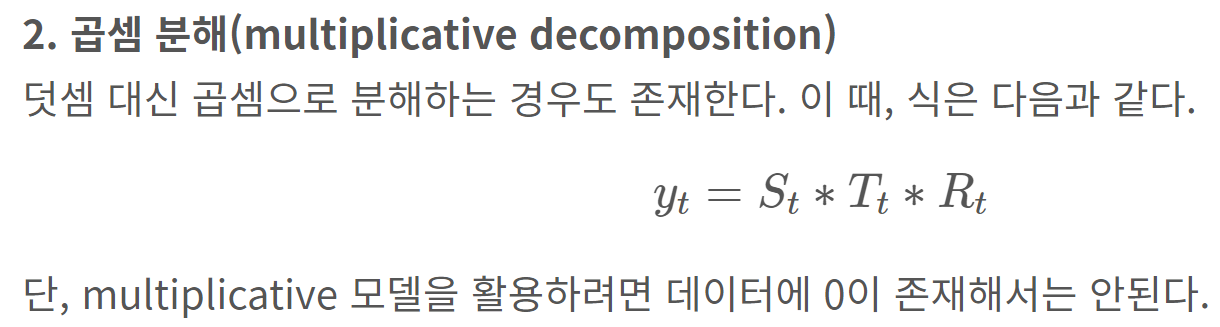

In [ ]:
### ARIMA 기법 이해하기 #### 

### 정상성(stationality)

- 시계열 데이터가 시간의 흐름에 따라 변하지 않음을 의미하며 평균 및 분산이 시간의 추이에 따라 일정함을 갖는 성질을 의미함 
-> 추세 및 계절성이 있는 데이터는 비정상성 데이터 
-> 정상성을 갖도록 로그 변환 및 차분 과정을 거쳐 정상성 데이터로 만들어줘야함

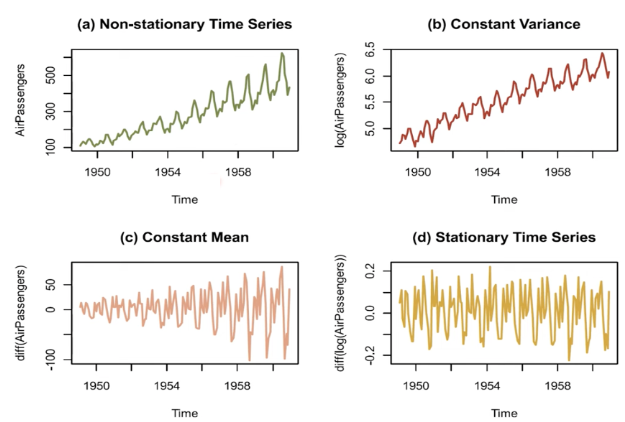

### 정상 시계열 변환 

- 변동폭이 일정하지 않은 경우: 로그 변환 
- 추세,계절성이 존재하는 경우: 차분(differencing, yt - y(t-1) [현재 시점에서의 값 - 이전 시점에서의 값])
* 단 차분의 경우 1차 차분 진행했을 때에도 정상성을 띄지 않는다면 정상성이 나타날 때까지 차분과정을 반복함

- ex) 위 그림에서 a와 같은 형태를 시계열 데이터가 띈다면 이는 비정상성 데이터로 볼 수 있다. 
- 이를 일정한 변동폭으로 유지하게끔 로그 변환을 하면 분산이 일정한 b와 같은 형태가 나타남
- 차분을 하면 c와 같이 평균은 일정하고 변동폭이 일정하지 않는 형태로 나타남 
- 로그 변환 및 차분을 함께 진행하면 d와 같은 평균 및 분산이 일정한 정상성 데이터로 나타남 

### 정상성 판별에 활용되는 검정 

- ACF 그래프를 통한 정상성 판별 

-> ACF(AutoCorrelation Function)은 시차에 따른 일련의 자기상관을 의미, 시차가 커질수록 ACF 값이 0에 수렴한다는 특징이 있음 
-> 이 때 정상 시계열은 상대적으로 0에 빠르게 수렴하는 반면, 비정상 시계열은 0을 향해 천천히 감소한다는 특성이 있음 

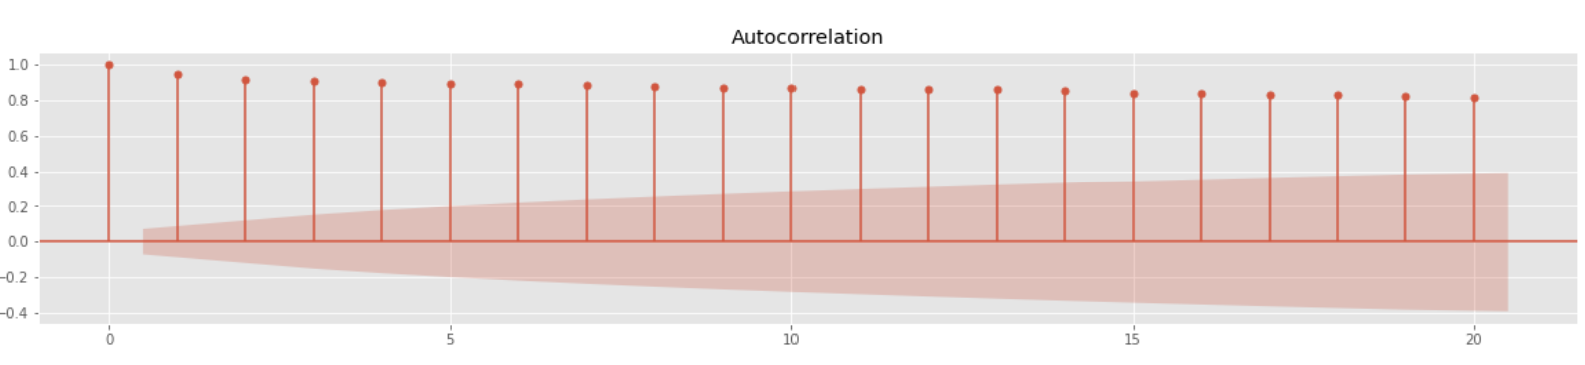


- ADF 검정(Augmented Dickey-Fuller test)를 통한 정상성 확인 

H0: 자료에 단위근이 존재함, 정상성을 만족하지 않음 
H1: 자료가 정상성을 만족함 

-> 귀무가설 기각 여부에 따라 정상성 판별 가능(ex. 귀무가설을 기각해야 정상성을 만족함) 

### ARIMA(Autoregressive Intergrated Moving Average) 

- AR(Autoregression, 자기상관)모형과 MA(Moving Average, 이동 평균)모형을 합친 모델 
- 정상성을 가지고 있다고 가정(만약 비정상성 데이터를 가져왔다면 로그 변환 및 차분과정을 거쳐 정상성 데이터로 만들어줘야함)
- 기본적으로 ARIMA(p,d,q)와 같이 3가지의 파라미터로 구성되어있는데 이때 p = 자기회귀 부분의 차수, d= 차분 회수, q = 이동평균 부분의 차수를 의미함  

In [ ]:
## kaggle weather data (time-series data tutorial)

In [3]:
! pip install plotly

In [4]:
# 모듈 불러오기 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import os 
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [10]:
weather_station_location = pd.read_csv("./Weather Station Locations.csv")
weather = pd.read_csv("./Summary of Weather.csv")

In [11]:
weather_station_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [12]:
# 필요한 열 추출 
location_refine = weather_station_location.drop(['LAT','LON','ELEV'], axis=1)
location_refine

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333
...,...,...,...,...,...
156,33109,EL AQUINA,TS,36.850000,10.016667
157,33121,EL DJEM,TS,35.333333,10.066667
158,33003,SISI AHMED,TS,37.200000,9.083333
159,33307,ADANA,TU,36.983333,35.016667


In [13]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
weather_refine = weather.loc[:,["STA","Date","MeanTemp"]]
weather_refine

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444
...,...,...,...
119035,82506,1945-12-27,23.333333
119036,82506,1945-12-28,23.888889
119037,82506,1945-12-29,23.333333
119038,82506,1945-12-30,23.333333


In [15]:
# 여리지역 가운데 BINDUKURI 지역의 일 평균 온도를 대상으로 분석 진행 

location_refine_id = location_refine[location_refine.NAME == 'BINDUKURI'].WBAN
weather_bin = weather_refine[weather_refine.STA == int(location_refine_id)]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"]) # 시계열 데이터로 변경 

In [16]:
weather_bin.head()

,STA,Date,MeanTemp
78252,32907,1943-05-11,28.888889
78253,32907,1943-05-12,25.555556
78254,32907,1943-05-13,24.444444
78255,32907,1943-05-14,23.888889
78256,32907,1943-05-15,27.777778


In [17]:
weather_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       751 non-null    int64         
 1   Date      751 non-null    datetime64[ns]
 2   MeanTemp  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB


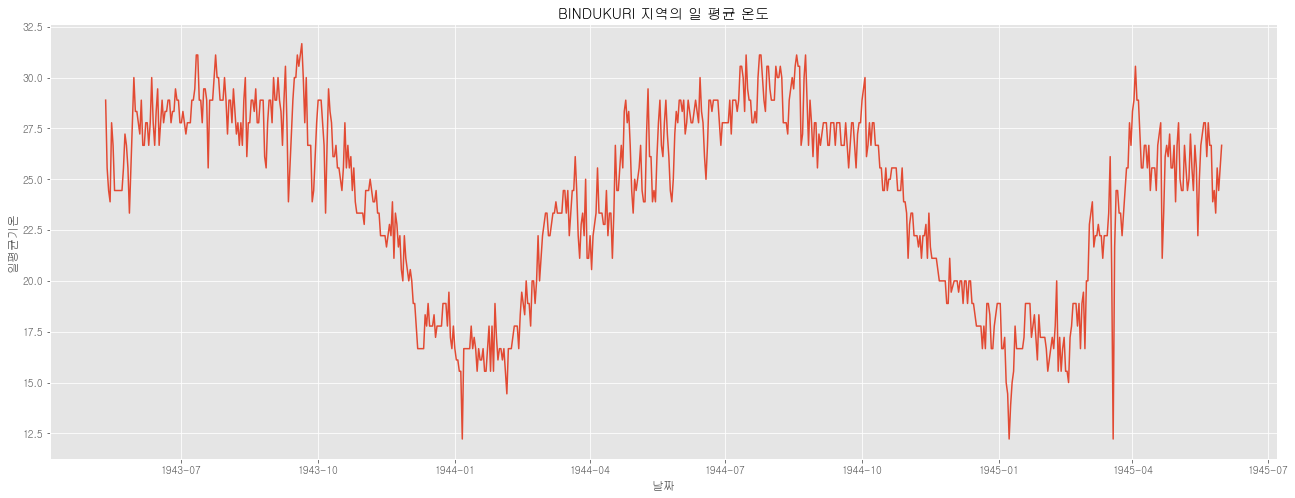

In [18]:
# 시계열 그래프(1943년 5월 11일 ~ 1945년 5월 31일)
# 한글 폰트 이용 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("BINDUKURI 지역의 일 평균 온도")
plt.xlabel("날짜")
plt.ylabel("일평균기온")
plt.show()

In [19]:
# 시계열 형태의 ts 데이터 만들기 

timeSeries = weather_bin.loc[:,["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis=1)
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


<Figure size 432x288 with 0 Axes>

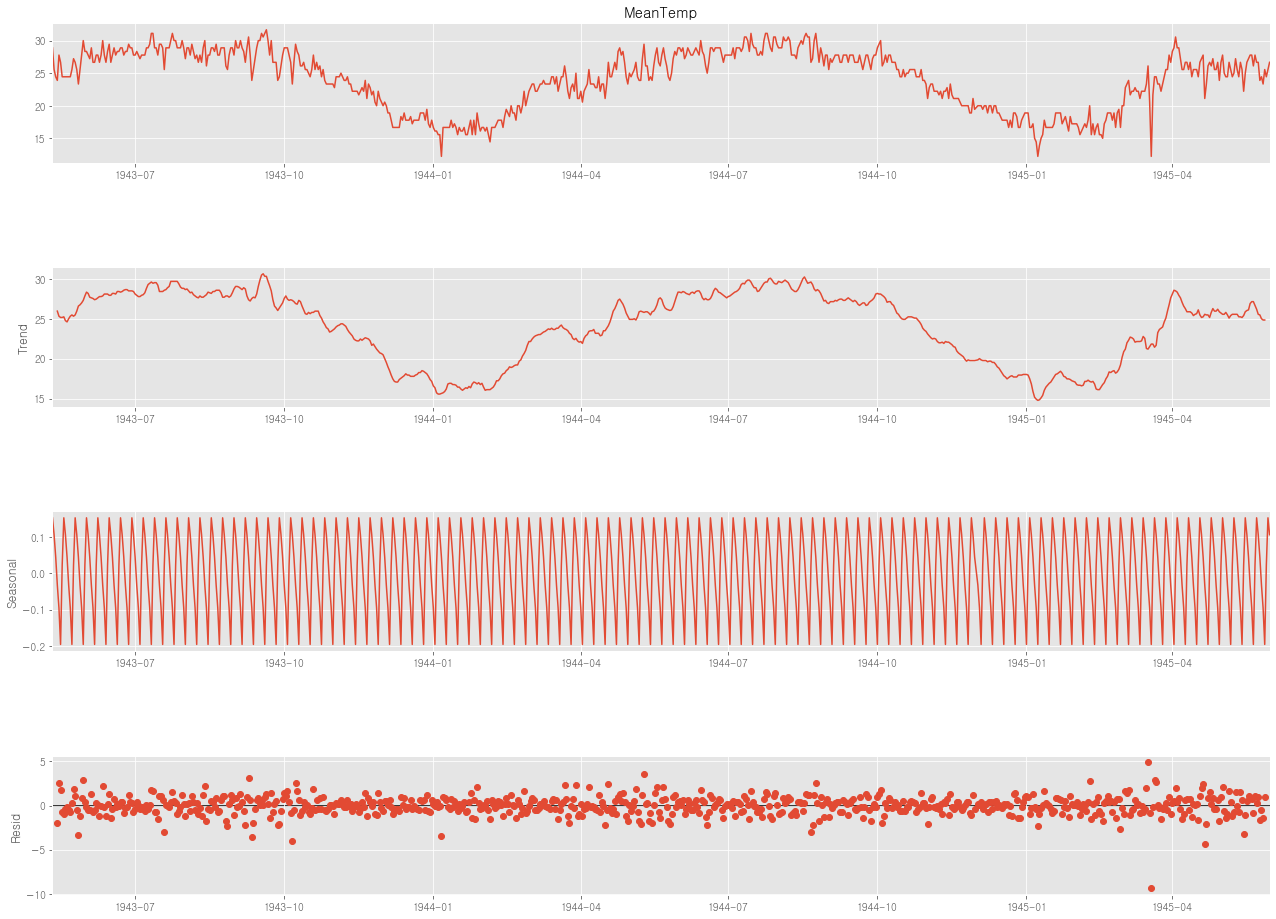

In [20]:
# seasonal_decompose()를 활용한 시계열 분해 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model='additive', freq=7) # 가법모형으로 분해 / freq(계절성 주기), 분기별(4),월별(12),일별(7)로 셋팅함

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

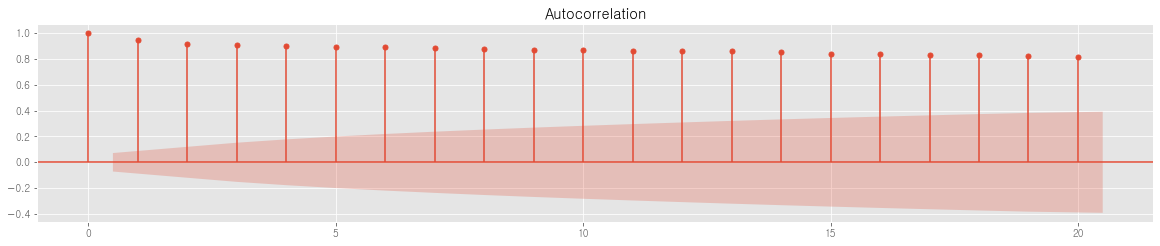

In [21]:
# 정상성을 검정하기 위한 방법(ACF 그래프)
import statsmodels.api as sm 

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

# 값이 매우 천천히 감소하고 있음을 통해 정상성을 만족하지 않음을 알 수 있다. 

In [22]:
# ADF 검정 

from statsmodels.tsa.stattools import adfuller 
result = adfuller(ts)
print('ADF 검정통계량: %f' % result[0])
print('p-value: %f' % result[1])
print('임계값: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF 검정통계량: -1.409597
p-value: 0.577667
임계값: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


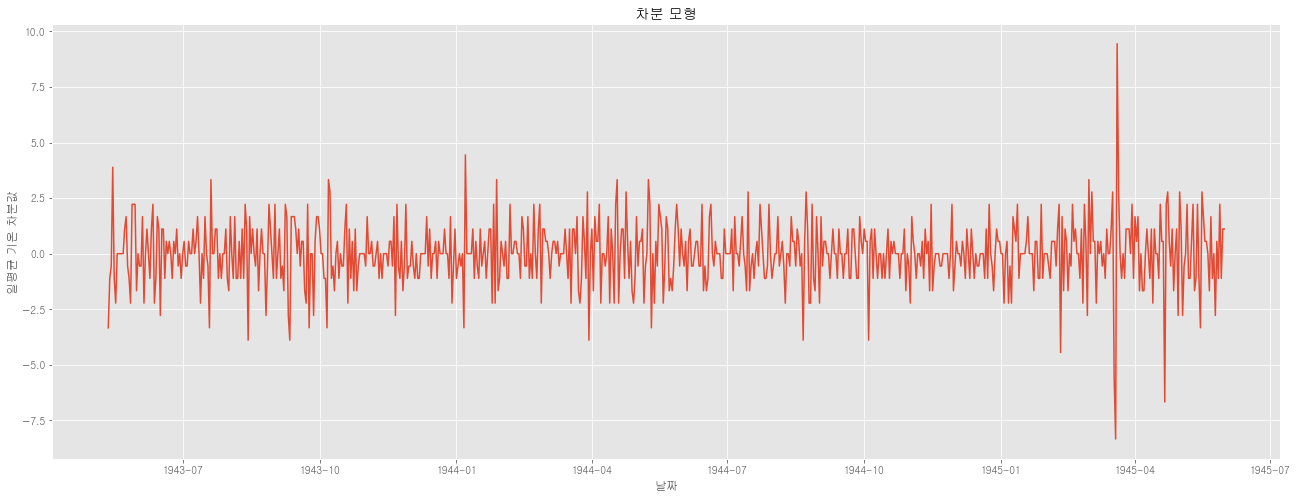

In [23]:
# 계절성이 보여 차분 진행 
ts_diff = ts - ts.shift()
plt.figure(figsize = (22,8))
plt.plot(ts_diff)
plt.title("차분 모형")
plt.xlabel("날짜")
plt.ylabel("일평균 기온 차분값")
plt.show()

In [24]:
ts_diff

,MeanTemp
Date,
1943-05-11,NaN
1943-05-12,-3.333333
1943-05-13,-1.111111
1943-05-14,-0.555556
1943-05-15,3.888889
...,...
1945-05-27,-1.111111
1945-05-28,2.222222
1945-05-29,-1.111111


In [25]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(ts_diff[1:])
print('ADF 검정통계량: %f' % result[0])
print('p-value: %f' % result[1])
print('임계값: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))
    
# 귀무가설 기각 -> 정상성 만족 

ADF 검정통계량: -11.678956
p-value: 0.000000
임계값: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


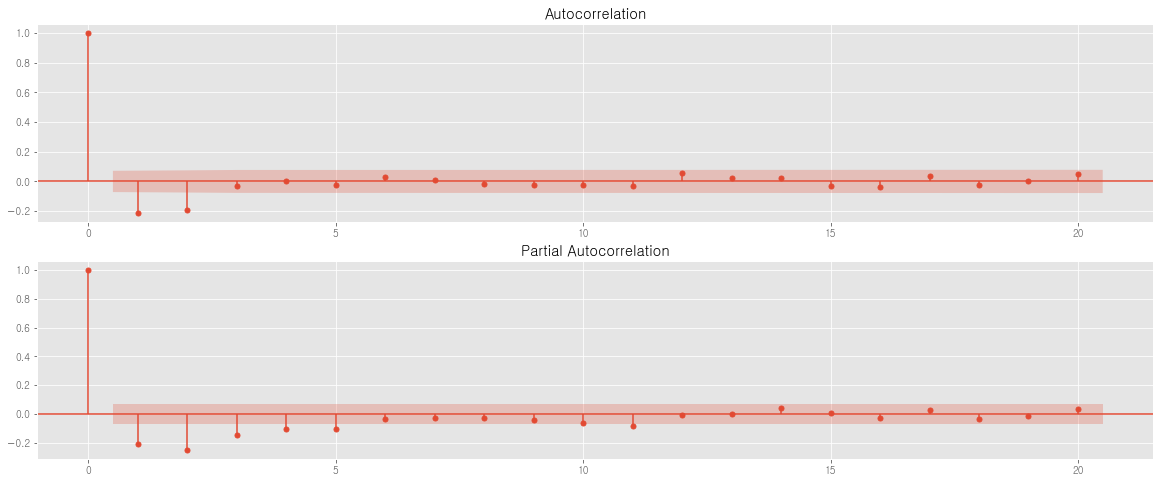

In [26]:
# ARIMA 모델의 p,q 파라미터를 정하기 위해 정상성 데이터를 통해 ACF, PACF 그래프를 그려봄 (d = 1)
import statsmodels.api as sm 

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)

C:\Users\KANGJIHUN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\KANGJIHUN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



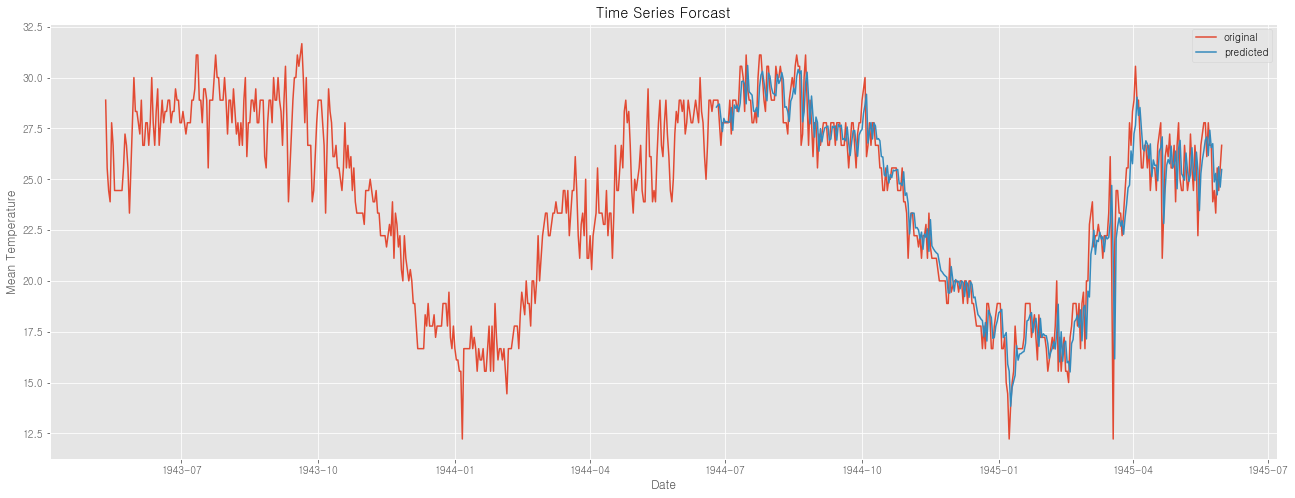

In [40]:
# ARIMA(2,1,2) 모델을 통한 예측 실험 

from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime 

# fit model 
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

# predict 
start_index = datetime(1944, 6 ,25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start = start_index, end = end_index, typ ='levels') # 차분한 모델에 대해선 default 파라미터인 linear를 사용할 경우 차분이 추가적으로 반영됨 

# visualization 
plt.figure(figsize = (22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label='original')
plt.plot(forecast, label='predicted')
plt.title("Time Series Forcast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

No handles with labels found to put in legend.


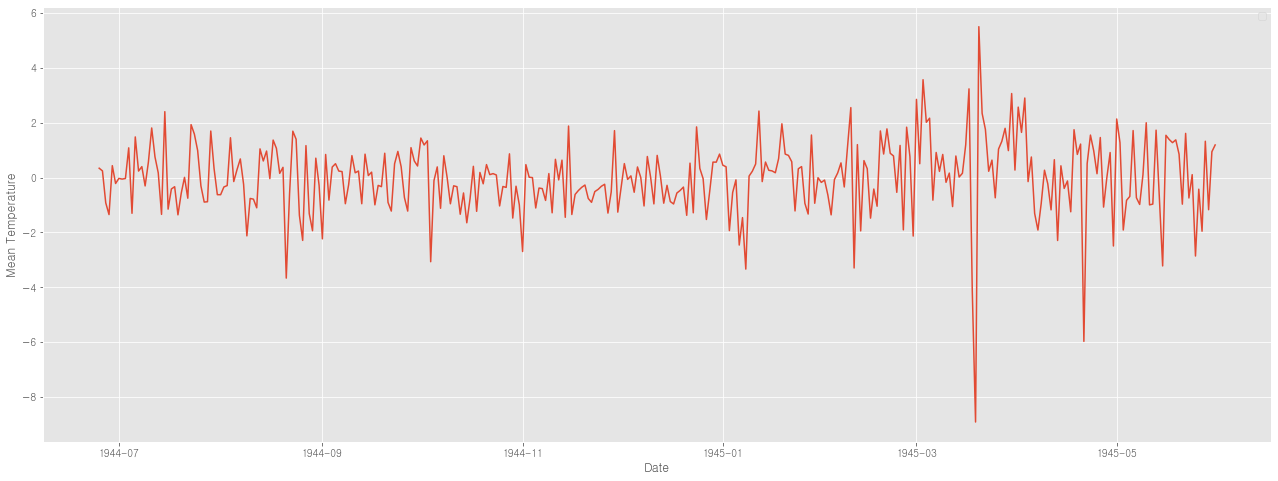

In [41]:
# ARIMA 모형 검증을 위한 잔차 분석 

resi = np.array(weather_bin[weather_bin.Date >= start_index].MeanTemp) - np.array(forecast) # 실제 일 평균 기온 - 예측값(잔차)

plt.figure(figsize = (22,8))
plt.plot(weather_bin.Date[weather_bin.Date >= start_index], resi)
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

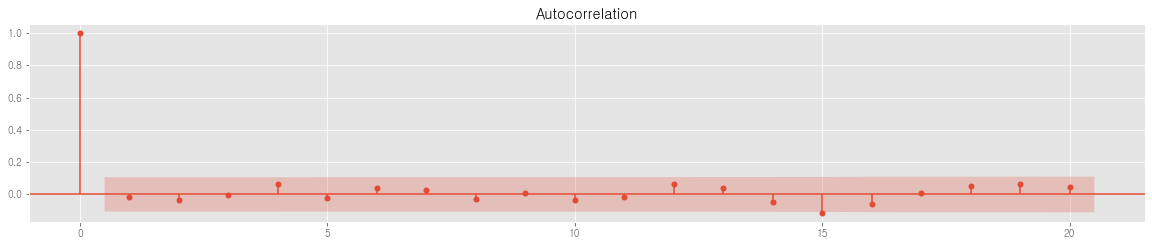

In [42]:
# 정상성을 검정하기 위한 방법(ACF 그래프)
import statsmodels.api as sm 

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

In [43]:
from statsmodels.tsa.stattools import adfuller 
result = adfuller(resi)
print('ADF 검정통계량: %f' % result[0])
print('p-value: %f' % result[1])
print('임계값: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))
# 귀무가설 기각 -> 정상성 만족 

ADF 검정통계량: -18.629916
p-value: 0.000000
임계값: 
	1%: -3.450
	5%: -2.870
	10%: -2.571


In [44]:
# ARIMA 모델 성능확인 

from sklearn import metrics 

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) *100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred) *100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False),3)
    
    df = pd.DataFrame({
        'R2' : r2,
        'Corr' : corr,
        'RMSE' : rmse,
        "MAPE" : mape
    }, index=[0])
    return df

In [46]:
scoring(np.array(weather_bin[weather_bin.Date >= start_index].MeanTemp),np.array(forecast))

,R2,Corr,RMSE,MAPE
0,91.019,0.954,1.365,4.449


- y: array 형태의 시계열 자료
- d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
- start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
- start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
- m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4이면 분기별, m=12면 월별, m=1이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
- seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
- stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.
- trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.

In [50]:
! pip install pmdarima

In [51]:
# 참고 Auto ARIMA 모델 

from pmdarima.arima import ndiffs
import pmdarima as pm

model = pm.auto_arima(y = ts        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 # p 및 q에 넣고 싶은 파라미터 시작 및 끝값을 넣고 차례대로 돌려 최적의 예측 성능을 가진 값을 도출
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2666.633, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2634.593, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2597.168, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2664.636, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2552.751, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2549.906, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2587.733, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2551.392, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2551.493, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2549.494, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2549.132, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2549.511, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2551.528, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2547.137, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]          

In [59]:
model_auto = pm.auto_arima (ts, d = 1, seasonal = False, trace = True)
model_fit_auto = model_auto.fit(ts)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2551.493, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2666.633, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2634.593, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2597.168, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2664.636, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2549.494, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2549.132, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2549.511, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2552.751, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2551.528, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2547.137, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2595.172, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2547.498, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2547.516, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [63]:
start_index = datetime(1944, 6 ,25)

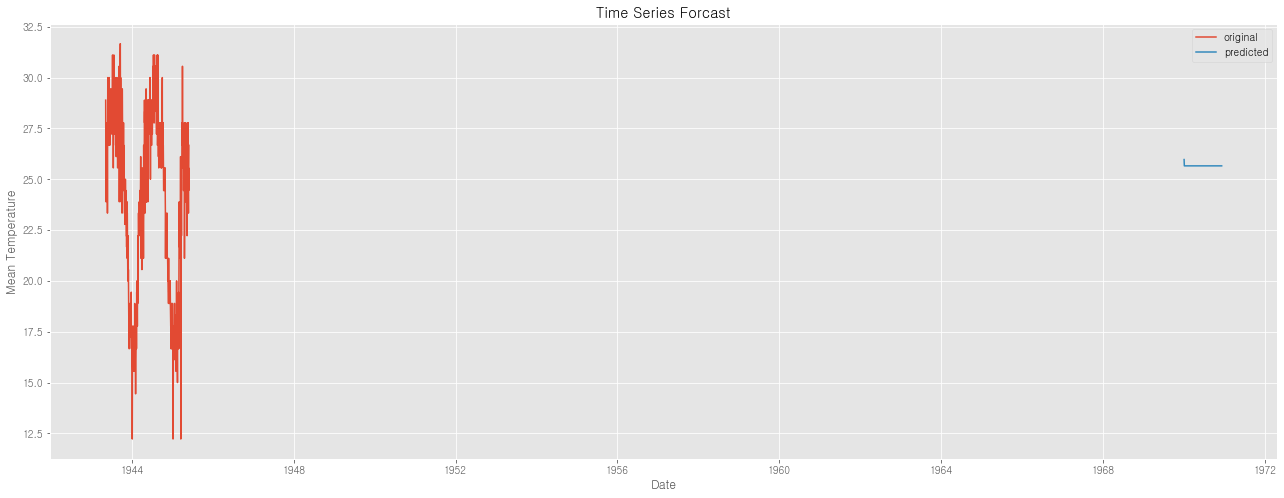

In [68]:
forecast_auto = model_auto.predict(n_periods = len(weather_bin[weather_bin.Date >= start_index]))

# visualization 
plt.figure(figsize = (22,8))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label='original')
plt.plot(forecast_auto, label='predicted')
plt.title("Time Series Forcast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [54]:
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  751
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1270.568
Date:                Wed, 06 Apr 2022   AIC                           2547.137
Time:                        01:34:27   BIC                           2560.997
Sample:                             0   HQIC                          2552.477
                                - 751                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3570      0.024    -15.115      0.000      -0.403      -0.311
ma.L2         -0.2623      0.029     -9.063      0.000      -0.319      -0.206
sigma2         1.7328      0.060     28.903      0.0

In [ ]:
scoring(np.array(weather_bin[weather_bin.Date >= start_index].MeanTemp),np.array(forecast))

340

- ARIMA 모델은 추가적인 component를 고려함으로써 다양한 형태로 변형, 발전될 수 있습니다. 예를들어 추가적인 seasonal component를 고려하는 SARIMA가 있으며, univarite time-series가 아닌 추가적인 covariates를 함께 고려하여 예측을 할 수 있는 ARIMAX 모델이 존재합니다. 물론, 이 두가지를 모두 혼합한 SARIMAX 모델도 사용되곤 합니다.

시계열 데이터의 머신러닝 모델

머신러닝 방식과 전통적인 통계적 방법의 목표는 동일합니다. 둘 다 sum of squared error과 같은 손실 함수(loss function)를 최소화 함으로써 예측 정확도를 향상시키는 것이 목표입니다. 전통적인 통계적 방법은 선형 처리를 하는 반면 머신러닝 방법은 비선형 알고리즘을 사용하여 최소화를 시켜서 목표를 달성합니다. 최근에는 딥러닝을 이용하여 시계열 데이터의 연속성을 찾아내는 방법이 연구되고 있다. RNN 종류의 LSTM이 좋은 성능을 냅니다. 머신러닝 알고리즘과 세부적으로 딥러닝 알고리즘 목록은 아래와 같습니다.

머신러닝

Multi-Layer Perceptron (MLP)
Bayesian Neural Network (BNN)
Radial Basis Functions (RBF)
Generalized Regression Neural Networks (GRNN)
kernel regression K-Nearest Neighbor regression (KNN)
CART regression trees (CART)
Support Vector Regression (SVR)
Gaussian Processes (GP)


딥러닝

Recurrent Neural Network (RNN)
Long Short-Term Memory (LSTM)